<a href="https://colab.research.google.com/github/jainavnish421/Machine-Learning/blob/main/ML_Experiment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANN**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
 dense_7 (Dense)             (None, 8)                 264       
                                                                 
 dense_8 (Dense)             (None, 10)                90        
                                                                 
Total params: 25,474
Trainable params: 25,474
Non-trainable params: 0
_________________________________________________________________
Mounted at /content/drive
Epoch 1/160
118/118 [==============================] - 1s 5ms/step - loss: 2.3422 - accuracy: 0.1147
Epoch 2/160
118/118 [==============================] - 1s 5ms/step - loss: 2.3113 - accuracy: 0.1141
Epoch 3/160
118/118 [==============================] - 1s 5ms/step - loss: 2.2963 - ac

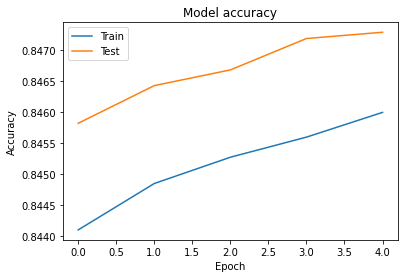

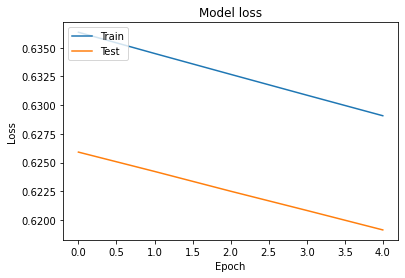

In [3]:
# 28/03/2023

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)
test_labels

from keras import models
from keras import layers
network = models.Sequential()

# Dense(32) is a fully-connected layer with 32 hidden units.
# in the first layer, you must specify the expected input data shape :
# here, 28 X 28=784 -dimensional vectors.
network.add(layers.Dense(32, activation='sigmoid', input_shape=(28 * 28, )))
network.add(layers.Dense(8, activation='sigmoid'))
network.add(layers.Dense(10, activation='softmax'))
network.summary()
from google.colab import drive
drive.mount('/content/drive')
network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

#Before training, we will preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the [0−1]  interval
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255.
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255.

#Preparing the labels
#We also need to categorically encode the labels.
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
train_labels
test_labels = to_categorical(test_labels)
test_labels

#Training and Testing
#We are now ready to train the network, which in Keras is done via a call to the network's fit method--we fit the model to its training data:
network.fit(train_images, train_labels, epochs=160, batch_size=512)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Accuracy: {:.5f} '.format(test_acc))
test_acc
from keras.utils import plot_model
plot_model(network, to_file='model.png')
import matplotlib.pyplot as plt
history =network.fit(train_images, train_labels, validation_split=0.33,epochs=5, batch_size=512)
history_dict = history.history
print(history_dict.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()